# Build a model to predict the tip amount of waiter.

# Problem Statement:
One waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all he recorded 244 tips.

*The Goal of this challenge is to build a prediction model that predicts the amout of tip waiter will get at the end of day.*

# Dataset:
The data was reported in a collection of case studies for business statistics.

Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

The dataset is also available through the Python package Seaborn.

# Step 1: Import all the required libraries
- Pandas : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- Sklearn : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

*In this stage we are going to read our problem dataset and have a look on it.*

In [2]:
#loading training data
try:
    df = pd.read_csv('/Users/amitpandey/TIPS.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   



Data read done successfully...


In [3]:
df.head()
#by this we get the first 5 cols

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Data Preprocesssing

In [4]:
target = df['tip']   # -> dependent
features = df.drop('tip', axis = 1) # -> independent
#simply showing which is dependent and independent variable

In [5]:
#showing target column, feature columns
target,features

(0      1.01
 1      1.66
 2      3.50
 3      3.31
 4      3.61
        ... 
 239    5.92
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 244, dtype: float64,
      total_bill     sex smoker   day    time  size
 0         16.99  Female     No   Sun  Dinner     2
 1         10.34    Male     No   Sun  Dinner     3
 2         21.01    Male     No   Sun  Dinner     3
 3         23.68    Male     No   Sun  Dinner     2
 4         24.59  Female     No   Sun  Dinner     4
 ..          ...     ...    ...   ...     ...   ...
 239       29.03    Male     No   Sat  Dinner     3
 240       27.18  Female    Yes   Sat  Dinner     2
 241       22.67    Male    Yes   Sat  Dinner     2
 242       17.82    Male     No   Sat  Dinner     2
 243       18.78  Female     No  Thur  Dinner     2
 
 [244 rows x 6 columns])

In [6]:
df.info()
#checking for categorical cols AND numerical cols
# categorical -> sex, smoker, day, time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


**With the info function will get to know that we have zero non null values to whole dataset and we have total 3 types of data types in dataset which is, numerical, object and datetime**

In [7]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)



In [8]:
print("total number of cateogrical columns are ", len(objects_lst))
print("there names are as follows: ", objects_lst)

total number of cateogrical columns are  4
there names are as follows:  ['sex', 'smoker', 'day', 'time']


In [9]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [10]:
print("total number of numerical columns are ", len(int64_lst))
print("there names are as follows: ", int64_lst)

total number of numerical columns are  1
there names are as follows:  ['size']


In [11]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [12]:
print("total number of float64 columns are ", len(float64_lst))
print("there name are as follow: ", float64_lst)

total number of float64 columns are  2
there name are as follow:  ['total_bill', 'tip']


In [13]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 244 rows and 7 columns


# Step 3: Descriptive Analysis
**Goal/Purpose: find the data distribution of the features. Visualization, it helps to understand data and also to explain the data to another person**


# Things we are going to do in this step:
1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [14]:
df.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


# Measure the variability of data of the dataset
Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation
The standard deviation is the average amount of variability in your dataset.

*It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.*

In [15]:
df.std()

total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64

# 2. Variance
The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

*Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.*

In [16]:
df.var()

total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64

# Measure central tendency
A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.


# 1. Mean
The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [17]:
df.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

# 2. Median

The median is the middle value. It is the value that splits the dataset in half.

In [18]:
df.median()

total_bill    17.795
tip            2.900
size           2.000
dtype: float64

# 3. Mode
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

In [19]:
df.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


# NULL & NAN Values

In [20]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

as u can see there is no NULL values in data set

In [21]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

as u can see there is no NAN values in data set

# Count of unique occurences of every value in all categorical cols


In [22]:
cols = ['sex', 'smoker', 'day', 'time']

In [23]:
for value in cols:
    print(value, ":" ,df[value].unique())

sex : ['Female' 'Male']
smoker : ['No' 'Yes']
day : ['Sun' 'Sat' 'Thur' 'Fri']
time : ['Dinner' 'Lunch']


# Now, we gonna convert categoricals values into numbers

In [24]:
#By using one_hot_encoding
Sex = pd.get_dummies(df['sex'])

In [25]:
Smoker =  pd.get_dummies(df['smoker'])

In [26]:
Day =  pd.get_dummies(df['day'])

In [27]:
Time =  pd.get_dummies(df['time'])

In [28]:
#time to cross-verify if categorical values has changes into numbers
Sex

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
239,0,1
240,1,0
241,0,1
242,0,1


In [29]:
#after converting we need to concatenate new cols (numerical) into dataset

final_df = pd.concat([df, Sex, Smoker, Day, Time], axis=0)

final_df = final_df.drop(['sex', 'smoker', 'day', 'time'],axis = 1)


In [30]:
#Calling the new dataframe
final_df

,total_bill,tip,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.34,1.66,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.01,3.50,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.68,3.31,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.59,3.61,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [31]:
print ('The new dataset has {0} rows and {1} columns'.format(final_df.shape[0],final_df.shape[1]))

The new dataset has 1220 rows and 13 columns


In [32]:
#From above you can see there are nan values in datset which we need to fill up
final_df = final_df.fillna(value=0)



In [33]:
#checking for presense of any null value in dataset
final_df.isnull().sum()

total_bill    0
tip           0
size          0
Female        0
Male          0
No            0
Yes           0
Fri           0
Sat           0
Sun           0
Thur          0
Dinner        0
Lunch         0
dtype: int64

In [34]:
final_df

,total_bill,tip,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,1.66,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.50,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,3.31,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,3.61,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
240,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
241,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Skewness 

In [35]:
final_df['tip'].skew()


2.4874636677678414

In [36]:
#making a function to check skewness for all numerical cols
def left_or_right_skew(df,col):
    
    rs=final_df[value].skew()
    
   
    if rs > 0:
        return "positive (+ve) skewed"
    
    elif rs == 0:
        return "normal skewed"
    
    elif rs < 0:
        return "negative (-ve) skewed"
        

In [37]:
#only for numerical cols
cols = [
    'total_bill',
    'tip',
    'size'
    
]
for value in cols:
    
    print(value, "---->", left_or_right_skew(final_df,value))

total_bill ----> positive (+ve) skewed
tip ----> positive (+ve) skewed
size ----> positive (+ve) skewed


# Step 4: Data Exploration
Goal/Purpose:-

*Graphs we are going to develop in this step*

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Scatter plot to fing the relationship of target variable with features
4. Boxplot to find out outlier in the feature columns


# 1. Histogram 

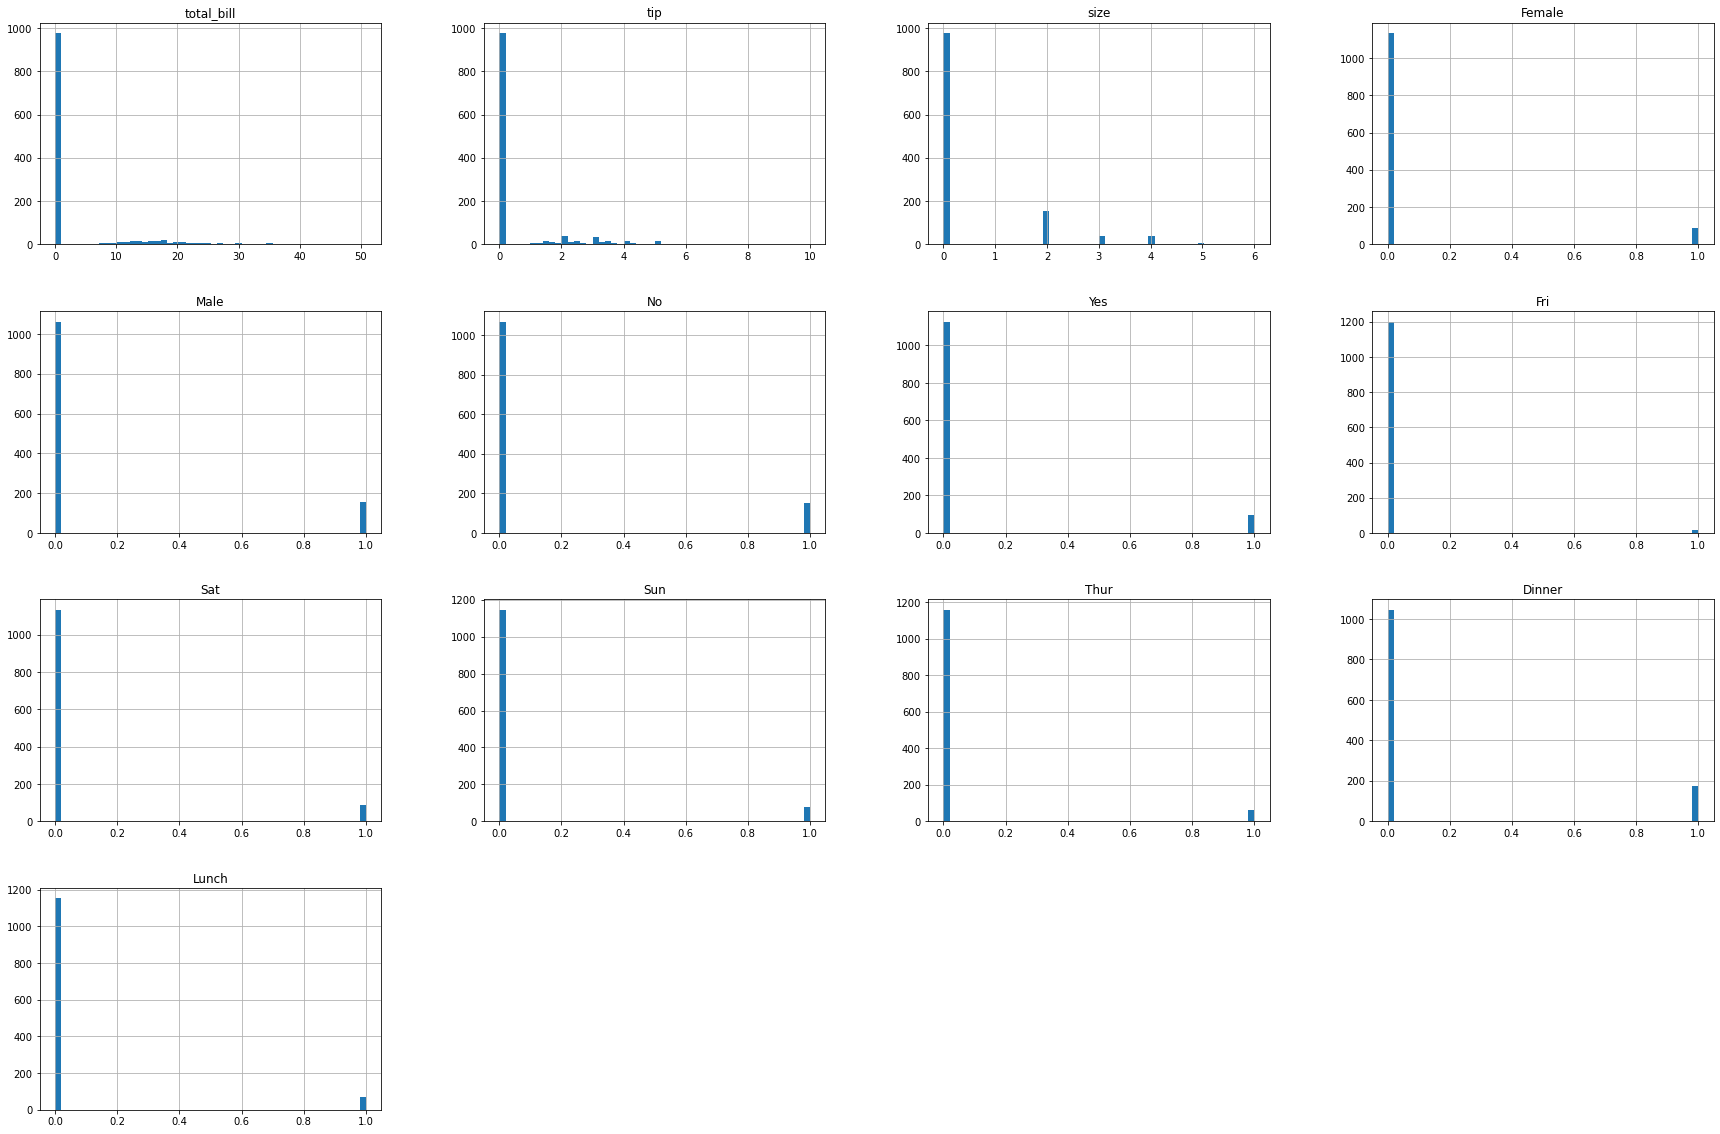

In [38]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
final_df.hist(bins=50, figsize=(30,20))
plt.show()

# 2. Distplot 

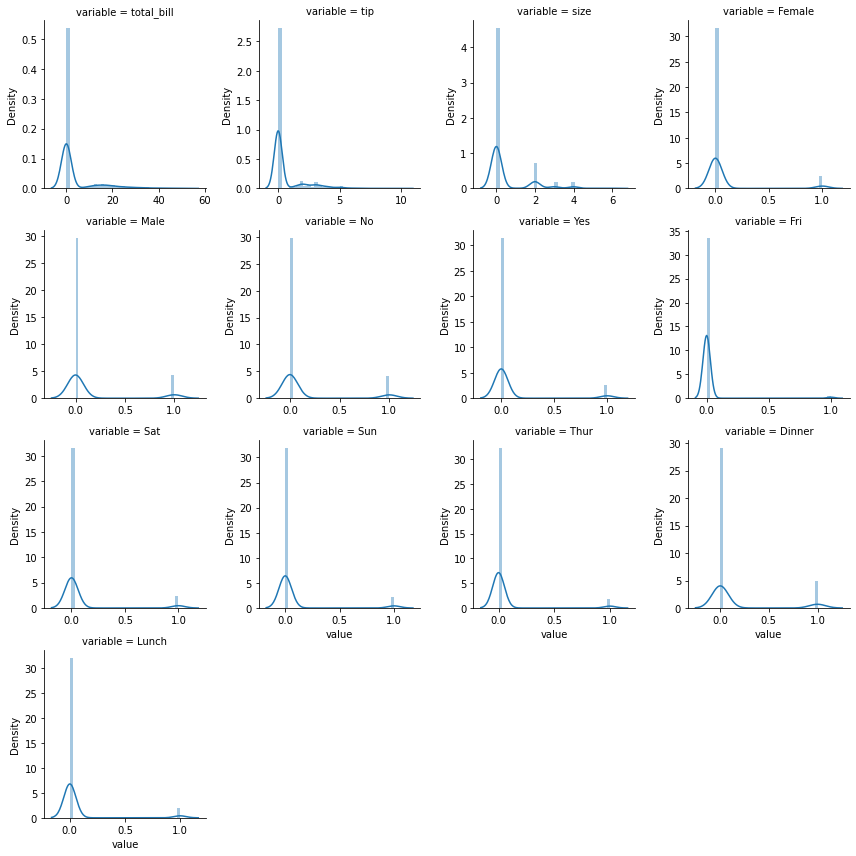

In [39]:
num = [f for f in final_df.columns if final_df.dtypes[f] != 'object']
nd = pd.melt(final_df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

# 3. HeatMap

Correlation within feature variables

Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.



Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation

In [40]:
corr = final_df.corr()

<AxesSubplot:>

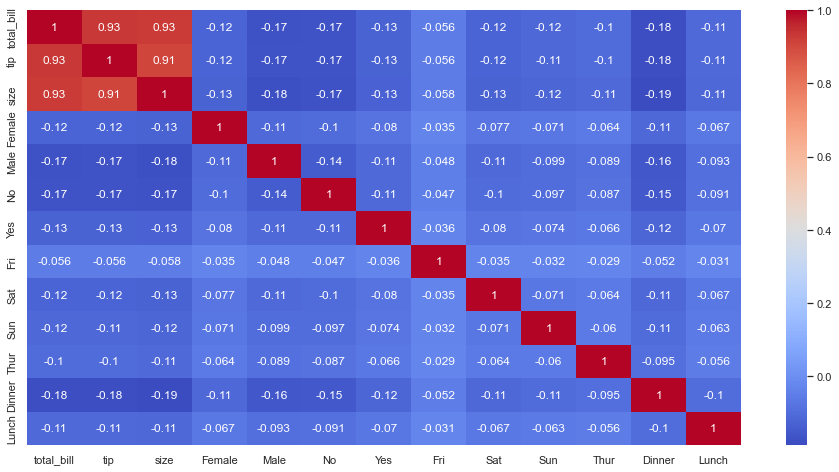

In [41]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')

In [42]:
corr

,total_bill,tip,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
total_bill,1.000000,0.933350,0.928503,-0.123825,-0.171731,-0.167944,-0.128364,-0.056204,-0.123825,-0.115175,-0.103397,-0.183473,-0.108566
tip,0.933350,1.000000,0.907251,-0.123183,-0.170840,-0.167073,-0.127698,-0.055913,-0.123183,-0.114578,-0.102860,-0.182521,-0.108003
size,0.928503,0.907251,1.000000,-0.128062,-0.177607,-0.173691,-0.132757,-0.058128,-0.128062,-0.119116,-0.106935,-0.189751,-0.112281
Female,-0.123825,-0.123183,-0.128062,1.000000,-0.106495,-0.104146,-0.079602,-0.034854,-0.076787,-0.071423,-0.064119,-0.113776,-0.067324
Male,-0.171731,-0.170840,-0.177607,-0.106495,1.000000,-0.144438,-0.110398,-0.048338,-0.106495,-0.099055,-0.088925,-0.157794,-0.093371
No,-0.167944,-0.167073,-0.173691,-0.104146,-0.144438,1.000000,-0.107964,-0.047272,-0.104146,-0.096871,-0.086964,-0.154314,-0.091312
Yes,-0.128364,-0.127698,-0.132757,-0.079602,-0.110398,-0.107964,1.000000,-0.036131,-0.079602,-0.074041,-0.066469,-0.117947,-0.069792
Fri,-0.056204,-0.055913,-0.058128,-0.034854,-0.048338,-0.047272,-0.036131,1.000000,-0.034854,-0.032419,-0.029104,-0.051643,-0.030559
Sat,-0.123825,-0.123183,-0.128062,-0.076787,-0.106495,-0.104146,-0.079602,-0.034854,1.000000,-0.071423,-0.064119,-0.113776,-0.067324
Sun,-0.115175,-0.114578,-0.119116,-0.071423,-0.099055,-0.096871,-0.074041,-0.032419,-0.071423,1.000000,-0.059640,-0.105828,-0.062621


**as we know, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors.**

In [43]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [44]:
to_drop

[]

as we see there is no feature columns with correlation greater than 0.8, so we don't need to remove any feature columns from our dataset

In [45]:
# numerical and caterogrical 

# numerical two variables or relationship -> scatter plot, 
# numerical single variables -> box plat, frequency or bar graph, histogram
# caterogrical sinlge -> pie chart, histogram, frequency or bar graph, box plot, wordcloud
# correlation -> heatmap 

# 4. Scatter Plot

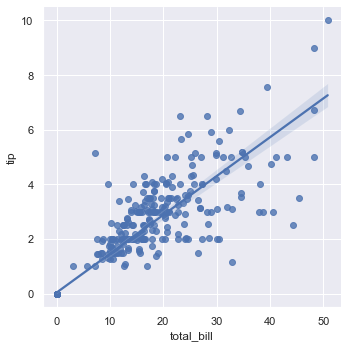

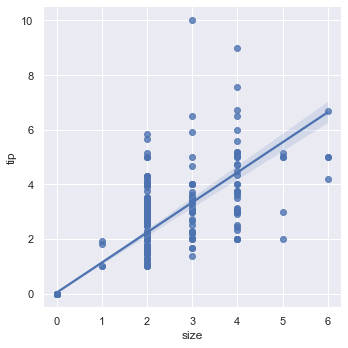

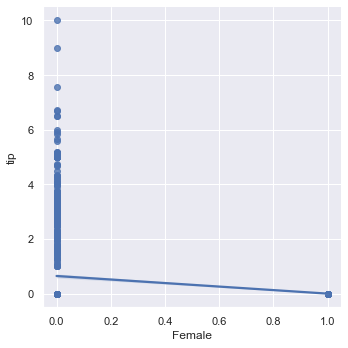

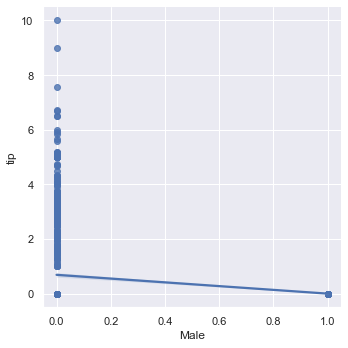

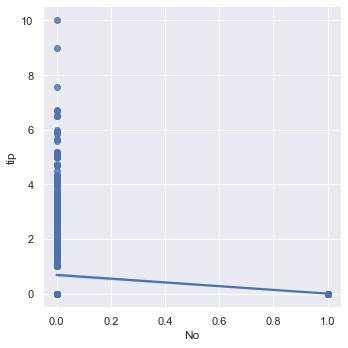

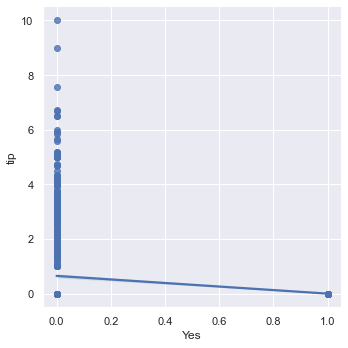

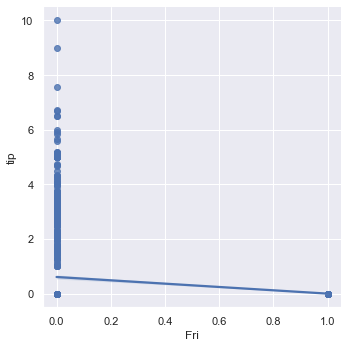

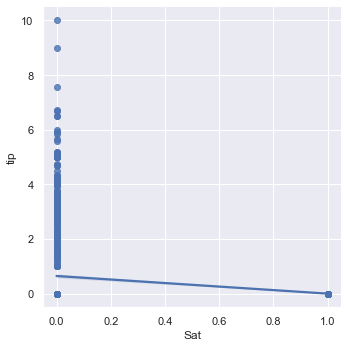

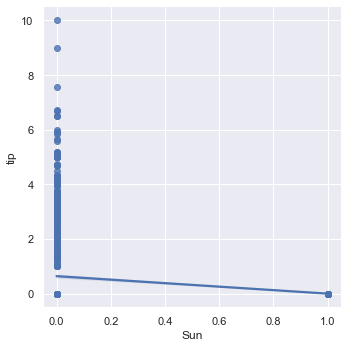

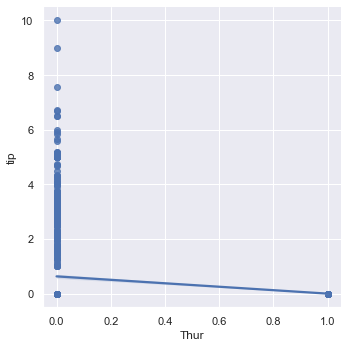

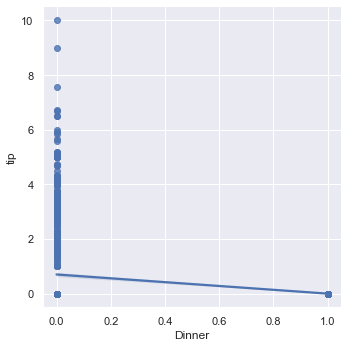

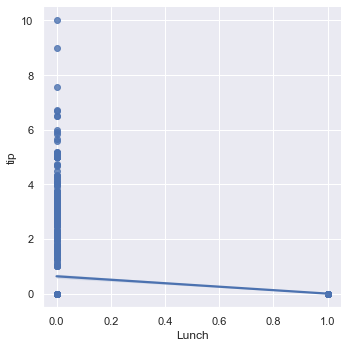

In [46]:
#btw target variable and features
cola = ['total_bill','size','Female','Male','No','Yes','Fri','Sat','Sun','Thur','Dinner','Lunch']
for value in cola:
    sns.lmplot(x=value, y="tip", data=final_df);

plt.show()

# 5. BoxPLot

In [47]:
#boxplot for features~ to check for outliers

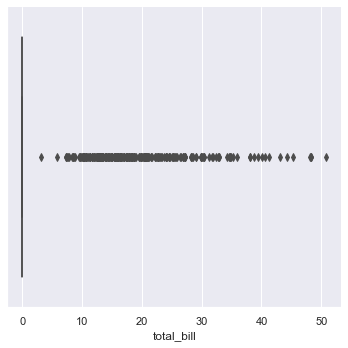

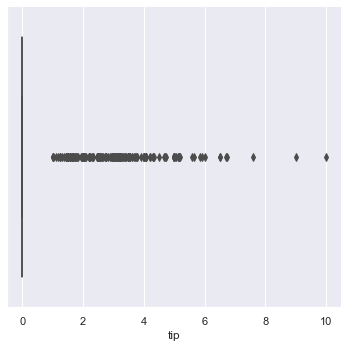

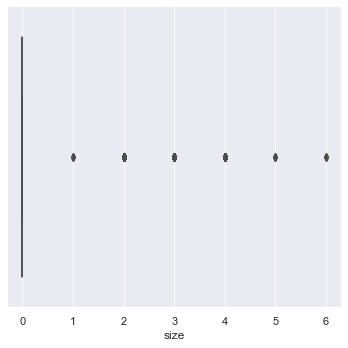

In [48]:
for value in cols:
    sns.catplot(data= final_df, x=value, kind="box")
    
# outliers present in total_bill, size

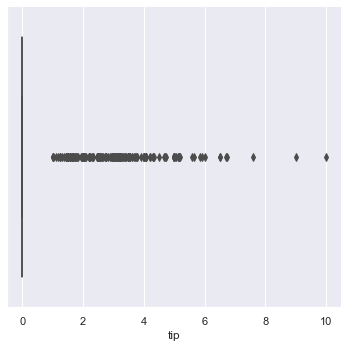

In [49]:
#boxplot for target
sns.catplot(data= final_df, x='tip', kind="box")

#outliers present in tip



In [50]:
final_df.shape

(1220, 13)

# OUTLIERS TREATMENT   

In [51]:
final_df.shape

(1220, 13)

In [52]:
from scipy import stats
z=np.abs(stats.zscore(final_df.total_bill))
print(z)

0      1.471690
1      0.720759
2      1.925636
3      2.227138
4      2.329897
         ...   
239    0.446853
240    0.446853
241    0.446853
242    0.446853
243    0.446853
Name: total_bill, Length: 1220, dtype: float64


In [53]:
threshold=3
print(np.where(z>3))

(array([ 11,  23,  39,  47,  52,  56,  59,  83,  85,  95, 102, 112, 141,
       142, 156, 167, 170, 173, 175, 179, 180, 182, 184, 197, 207, 212,
       237, 238]),)


In [54]:
final_df=final_df[(z< 3)]
print(final_df)

     total_bill   tip  size  Female  Male   No  Yes  Fri  Sat  Sun  Thur  \
0         16.99  1.01   2.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1         10.34  1.66   3.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2         21.01  3.50   3.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3         23.68  3.31   2.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4         24.59  3.61   4.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
..          ...   ...   ...     ...   ...  ...  ...  ...  ...  ...   ...   
239        0.00  0.00   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
240        0.00  0.00   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
241        0.00  0.00   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
242        0.00  0.00   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
243        0.00  0.00   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   

     Dinner  Lunch  
0       0.0    0.0  
1       0.0    0.0  
2       0.0    0.0  
3  

In [55]:
final_df.shape

(1192, 13)

# Step - 5: Saving the pre-processsed dataframe

In [56]:
# save preprocess dataframe to csv for model training purpose
final_df.to_csv('tip_df2.csv')